## Why Hierarchical Clustering?

## Here’s a brief overview of how K-means works:
Decide the number of clusters (k)

Select k random points from the data as centroids

Assign all the points to the nearest cluster centroid

Calculate the centroid of newly formed clusters

Repeat steps 3 and 4

It is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always makes spherical clusters. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

Hierarchical clustering takes away the problem of having to pre-define the number of clusters. So, let’s see what hierarchical clustering is and how it improves on K-means.

## **DATASET UPLOADING:-**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


## **REQUIRED LIBRARIES:-**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

## **READING THE DATASET:-**

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [5]:
df.drop(columns='CustomerID',inplace=True)

## **DATA PREPROCESSING:-**

In [7]:
#checking for null values:-
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
#checking for duplicated values:-
df.duplicated().sum()

np.int64(0)

## **STANDARDIZATION AND OUTLIER ANALYSIS IS NOT REQUIRED FOR THIS TRAINING PURPOSE:-**

## **DENDROGRAM CREATRION:-**

In [9]:
x=df[['Annual Income (k$)','Spending Score (1-100)']].values #converting the df into 2d array grid.

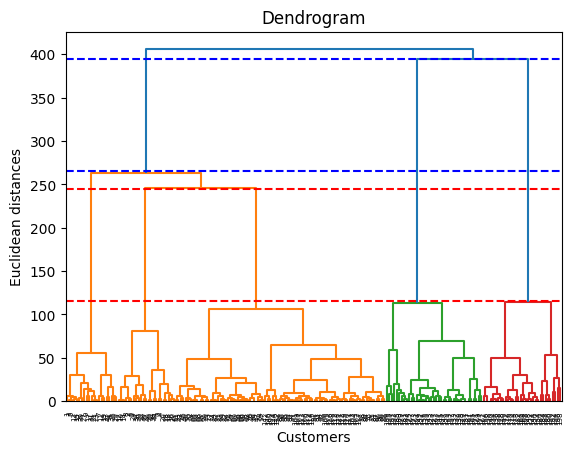

In [11]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward')) #ward method is used to minimize the variance in each cluster.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=394, color='b', linestyle='--')
plt.axhline(y=265, color='b', linestyle='--')
plt.axhline(y=244, color='r', linestyle='--')
plt.axhline(y=115, color='r', linestyle='--')
plt.show()


## **OPTIMAL NUMBER OF CLUSTERS ARE 5.**

In [14]:
model=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_pred=model.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
df['clusterid']=y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterid
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


## **VISUALIZATION:-**

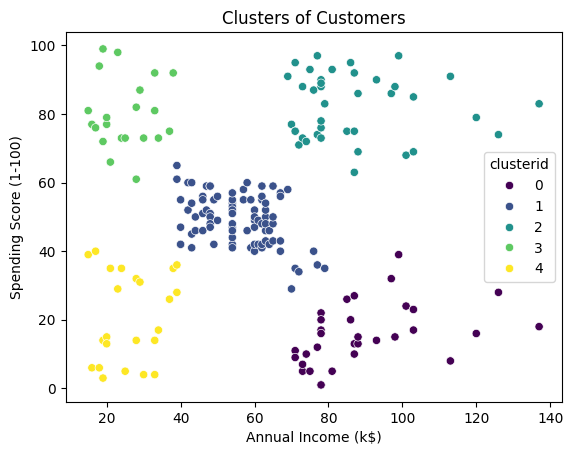

In [16]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='clusterid',data=df,palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.show()